# Final Project

In [1]:

# Option 2: Read directly from GitHub

richmondway <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-09-26/richmondway.csv')


Rows: 34 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Character, Season_Episode, Dating_flag, Coaching_flag
dbl (12): Episode_order, Season, Episode, F_count_RK, F_count_total, cum_rk_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
richmondway%>%head()

Character,Episode_order,Season,Episode,Season_Episode,F_count_RK,F_count_total,cum_rk_season,cum_total_season,cum_rk_overall,cum_total_overall,F_score,F_perc,Dating_flag,Coaching_flag,Imdb_rating
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Roy Kent,1,1,1,S1_e1,2,13,2,13,2,13,0.1538462,15.4,No,No,7.8
Roy Kent,2,1,2,S1_e2,2,8,4,21,4,21,0.2500000,25.0,No,No,8.1
Roy Kent,3,1,3,S1_e3,7,13,11,34,11,34,0.5384615,53.8,No,No,8.5
Roy Kent,4,1,4,S1_e4,8,17,19,51,19,51,0.4705882,47.1,No,No,8.2
Roy Kent,5,1,5,S1_e5,4,13,23,64,23,64,0.3076923,30.8,No,No,8.9
Roy Kent,6,1,6,S1_e6,2,9,25,73,25,73,0.2222222,22.2,No,No,8.5


In [4]:
episode_order = c('S1_e1','S1_e2', 'S1_e3', 'S1_e4', 'S1_e5','S1_e6','S1_e7','S1_e8','S1_e9','S1_e10','S2_e1','S2_e2', 'S2_e3', 'S2_e4', 'S2_e5','S2_e6','S2_e7','S2_e8','S2_e9','S2_e10','S2_e11','S2_e12','S3_e1','S3_e2', 'S3_e3', 'S3_e4', 'S3_e5','S3_e6','S3_e7','S3_e8','S3_e9','S3_e10','S3_e11','S3_e12')

In [5]:
richmondway2 <- richmondway %>%
   mutate(SE= fct_relevel(Season_Episode, episode_order)) %>%
 group_by(SE,Dating_flag) %>%
  summarize(mean_F_count_RK = mean(F_count_RK))

richmondway2



`summarise()` has grouped output by 'SE'. You can override using the `.groups`
argument.


SE,Dating_flag,mean_F_count_RK
<fct>,<chr>,<dbl>
S1_e1,No,2
S1_e2,No,2
S1_e3,No,7
S1_e4,No,8
S1_e5,No,4
S1_e6,No,2
S1_e7,No,5
S1_e8,Yes,7
S1_e9,Yes,14


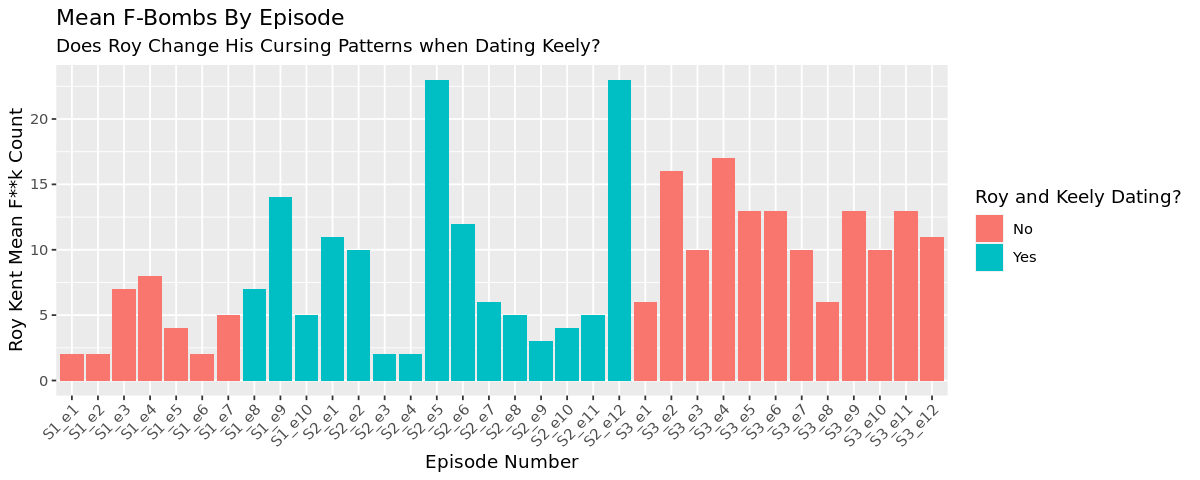

In [6]:
options(repr.plot.width = 10, repr.plot.height = 4)
p <- ggplot(richmondway2, aes(x = SE, y = mean_F_count_RK, fill=Dating_flag))+
  geom_bar(stat = "identity")+theme(axis.text.x = element_text(angle = 45, hjust = 1))+
labs(x="Episode Number", y="Roy Kent Mean F**k Count", fill="Roy and Keely Dating?", title="Mean F-Bombs By Episode", subtitle="Does Roy Change His Cursing Patterns when Dating Keely?")

p

In [7]:
richmondway3 <- richmondway %>%
   mutate(SE= fct_relevel(Season_Episode, episode_order)) %>%
 group_by(SE,Coaching_flag) %>%
  summarize(mean_F_count_RK = mean(F_count_RK))

richmondway3


`summarise()` has grouped output by 'SE'. You can override using the `.groups`
argument.


SE,Coaching_flag,mean_F_count_RK
<fct>,<chr>,<dbl>
S1_e1,No,2
S1_e2,No,2
S1_e3,No,7
S1_e4,No,8
S1_e5,No,4
S1_e6,No,2
S1_e7,No,5
S1_e8,No,7
S1_e9,No,14


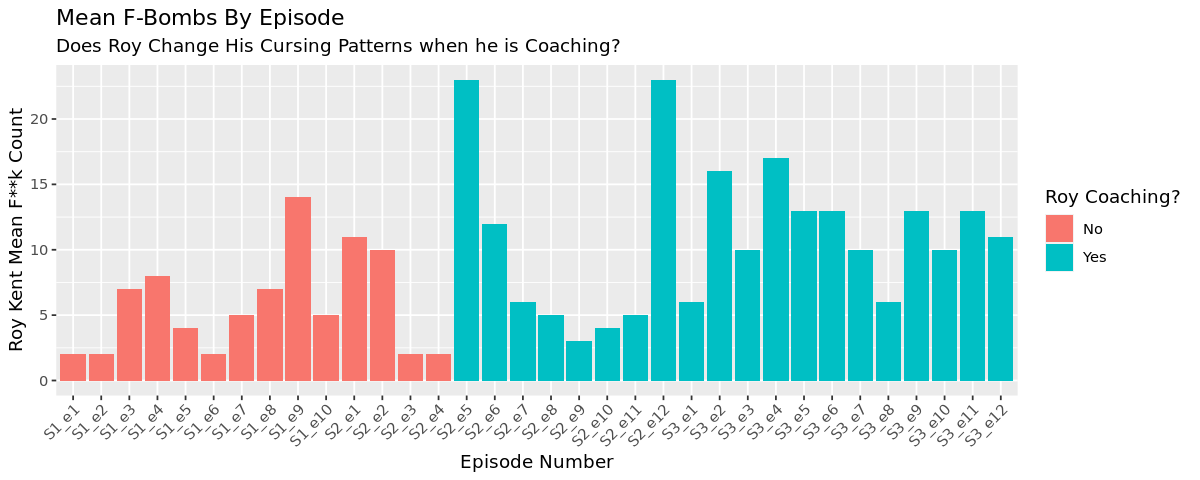

In [8]:
options(repr.plot.width = 10, repr.plot.height = 4)
p <- ggplot(richmondway3, aes(x = SE, y = mean_F_count_RK, fill=Coaching_flag))+
  geom_bar(stat = "identity")+theme(axis.text.x = element_text(angle = 45, hjust = 1))+
labs(x="Episode Number", y="Roy Kent Mean F**k Count", fill="Roy Coaching?", title="Mean F-Bombs By Episode", subtitle="Does Roy Change His Cursing Patterns when he is Coaching?")

p

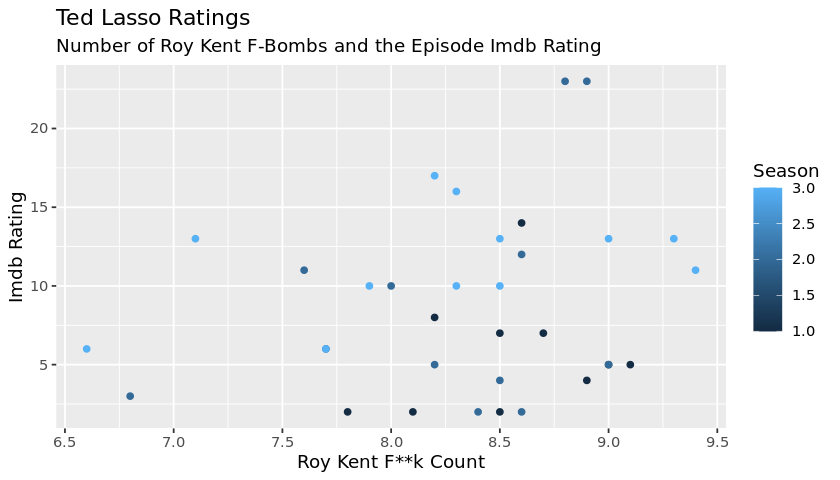

In [9]:
options(repr.plot.width = 7, repr.plot.height = 4)
p= ggplot(richmondway, aes(y=F_count_RK, x=Imdb_rating, color= Season))+ 
geom_point()+labs(y="Imdb Rating", x="Roy Kent F**k Count", title= "Ted Lasso Ratings", subtitle="Number of Roy Kent F-Bombs and the Episode Imdb Rating")

p

Roy Kent, Richmond player and later Coach, is a gruff and bad mouthed character in the hit show "Ted Lasso". This tidy tuesday dataset included data on the number of times Roy used the word F**k  in each episode of the show and some potentially associated factor. I wanted to see if his language use changes during some key events in the characters life, including a new girlfriend and taking a coaching postion on the team. I displayed this association but looking at a bar chart of the mean number of f-bombs in each episode and colorcoded which episodes he was either in a relationship or coaching the team. It looks to me like Coach Roy likes to use the F-bomb more than player Roy and Keely may have brought out the worst in him.

Additionally, this dataset included information about the viewer rating of each episode from Imdb.Do audiences like it when Roy curses alot? I wanted to see if the frequency at which Roy said F**k was associated with the viewer rating. I displayed the association between the two as a scatter plot with the number of f-bombs in the x axis and the viewer rating in the Y axis. Each point is color coded by the season in which the episode appears. I dont know about you, but it looks to me like viewers dont mind Roys bad mouth.  

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 